<a href="https://colab.research.google.com/github/MiggieCS911/DrugRepuposingSGLT2i/blob/main/CollectdataSGLT2_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data from chEMBL

In [ ]:
!pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 636 kB 11.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import seaborn as sns
%matplotlib inline

## Specific target to SGLT2

In [ ]:
target = new_client.target
target_query = target.search('Sodium/glucose cotransporter 2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P53792', 'xref_name': None, 'xre...",Rattus norvegicus,Sodium/glucose cotransporter 2,39.0,False,CHEMBL4316,"[{'accession': 'P53792', 'component_descriptio...",SINGLE PROTEIN,10116.0
1,"[{'xref_id': 'P31639', 'xref_name': None, 'xre...",Homo sapiens,Sodium/glucose cotransporter 2,39.0,False,CHEMBL3884,"[{'accession': 'P31639', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,"[{'xref_id': 'Q923I7', 'xref_name': None, 'xre...",Mus musculus,Sodium/glucose cotransporter 2,38.0,False,CHEMBL1075302,"[{'accession': 'Q923I7', 'component_descriptio...",SINGLE PROTEIN,10090.0
3,[],Homo sapiens,Sodium/myo-inositol cotransporter 2,36.0,False,CHEMBL1744524,"[{'accession': 'Q8WWX8', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,"[{'xref_id': 'P53790', 'xref_name': None, 'xre...",Rattus norvegicus,Sodium/glucose cotransporter 1,35.0,False,CHEMBL5374,"[{'accession': 'P53790', 'component_descriptio...",SINGLE PROTEIN,10116.0
...,...,...,...,...,...,...,...,...,...
2657,[],Escherichia coli,1-deoxy-D-xylulose 5-phosphate reductoisomerase,0.0,False,CHEMBL3421521,"[{'accession': 'W8T2T2', 'component_descriptio...",SINGLE PROTEIN,562.0
2658,[],Homo sapiens,PI3-kinase class I,0.0,False,CHEMBL3559703,"[{'accession': 'P27986', 'component_descriptio...",PROTEIN COMPLEX GROUP,9606.0
2659,[],Homo sapiens,20S proteasome,0.0,False,CHEMBL3831201,"[{'accession': 'P49721', 'component_descriptio...",PROTEIN COMPLEX,9606.0
2660,[],Mus musculus,Glutamate NMDA receptor,0.0,False,CHEMBL3832634,"[{'accession': 'P35436', 'component_descriptio...",PROTEIN COMPLEX GROUP,10090.0


In [ ]:
targets.loc[targets['pref_name'] == 'Sodium/glucose cotransporter 2']

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P53792', 'xref_name': None, 'xre...",Rattus norvegicus,Sodium/glucose cotransporter 2,39.0,False,CHEMBL4316,"[{'accession': 'P53792', 'component_descriptio...",SINGLE PROTEIN,10116.0
1,"[{'xref_id': 'P31639', 'xref_name': None, 'xre...",Homo sapiens,Sodium/glucose cotransporter 2,39.0,False,CHEMBL3884,"[{'accession': 'P31639', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,"[{'xref_id': 'Q923I7', 'xref_name': None, 'xre...",Mus musculus,Sodium/glucose cotransporter 2,38.0,False,CHEMBL1075302,"[{'accession': 'Q923I7', 'component_descriptio...",SINGLE PROTEIN,10090.0


In [ ]:
# select 'Sodium/glucose cotransporter 2' and organism = Homo sapiens -> row 1
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL3884'

CHEMBL3884 = SGLT2, homo sapiens

In [ ]:
#filter, bioactivity = IC50
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") 

In [ ]:
res

[{'activity_comment': None, 'activity_id': 1656446, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL863286', 'assay_description': 'Inhibitory activity towards human SGLT2 expressed in CHO-K1 cells', 'assay_type': 'B', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000219', 'bao_label': 'cell-based format', 'canonical_smiles': 'Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)c1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1141232', 'document_journal': 'Bioorg. Med. Chem. Lett.', 'document_year': 2005, 'ligand_efficiency': {'bei': '17.36', 'le': '0.33', 'lle': '6.52', 'sei': '5.31'}, 'molecule_chembl_id': 'CHEMBL183937', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL183937', 'pchembl_value': '7.96', 'potential_duplicate': True, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 410161, 'relation': 

In [ ]:
#createdataframe
df= pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1656446,[],CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,None,None,CHEMBL1141232,Bioorg. Med. Chem. Lett.,2005,"{'bei': '17.36', 'le': '0.33', 'lle': '6.52', ...",CHEMBL183937,None,CHEMBL183937,7.96,True,http://www.openphacts.org/units/Nanomolar,410161,=,1,True,=,None,IC50,nM,None,11.0,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,uM,UO_0000065,None,0.011
1,None,1656448,[],CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,None,None,CHEMBL1141232,Bioorg. Med. Chem. Lett.,2005,"{'bei': '13.88', 'le': '0.26', 'lle': '4.73', ...",CHEMBL371448,None,CHEMBL371448,6.31,False,http://www.openphacts.org/units/Nanomolar,410162,=,1,True,=,None,IC50,nM,None,491.0,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,uM,UO_0000065,None,0.491
2,None,1656450,[],CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,None,None,CHEMBL1141232,Bioorg. Med. Chem. Lett.,2005,"{'bei': '13.89', 'le': '0.26', 'lle': '5.57', ...",CHEMBL382302,None,CHEMBL382302,6.34,False,http://www.openphacts.org/units/Nanomolar,410163,=,1,True,=,None,IC50,nM,None,458.0,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,uM,UO_0000065,None,0.458
3,None,1656451,[],CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,None,None,CHEMBL1141232,Bioorg. Med. Chem. Lett.,2005,"{'bei': '13.33', 'le': '0.25', 'lle': '5.25', ...",CHEMBL382319,None,CHEMBL382319,6.27,False,http://www.openphacts.org/units/Nanomolar,410164,=,1,True,=,None,IC50,nM,None,532.0,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,uM,UO_0000065,None,0.532
4,None,1656453,[],CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,None,None,CHEMBL1141232,Bioorg. Med. Chem. Lett.,2005,"{'bei': '13.01', 'le': '0.25', 'lle': '5.34', ...",CHEMBL200608,None,CHEMBL200608,6.12,False,http://www.openphacts.org/units/Nanomolar,410165,=,1,True,=,None,IC50,nM,None,754.0,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,uM,UO_0000065,None,0.754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,None,19098695,[],CHEMBL4368019,Inhibition of human full length SGLT2 expresse...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(Cc2ccc3c(c2)[C@]2(OC3)O[C@H](C)[C@@H](...,None,None,CHEMBL4364314,Eur J Med Chem,2019,None,CHEMBL4579371,None,CHEMBL4579371,None,False,http://www.openphacts.org/units/Nanomolar,3186091,>,1,True,>,None,IC50,nM,None,100.0,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,nM,UO_0000065,None,100.0
1524,None,19098696,[],CHEMBL4368019,Inhibition of human full length SGLT2 expresse...,

In [ ]:
#same compound may have multiple test/ type of bioactivity
df[df['molecule_chembl_id']=='CHEMBL429910'].head(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
69,None,2922987,[],CHEMBL1043168,Inhibition of human SGLT2 expressed in HEK293....,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,None,None,CHEMBL1155186,Bioorg. Med. Chem. Lett.,2009,"{'bei': '19.99', 'le': '0.40', 'lle': '6.33', ...",CHEMBL429910,DAPAGLIFLOZIN,CHEMBL429910,8.17,True,http://www.openphacts.org/units/Nanomolar,849728,=,1,True,=,None,IC50,nM,None,6.7,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,nM,UO_0000065,None,6.7
72,None,2989791,[],CHEMBL1050643,Inhibition of human SGLT2 transfected in HEK29...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,None,None,CHEMBL1156745,Bioorg. Med. Chem. Lett.,2009,"{'bei': '19.99', 'le': '0.40', 'lle': '6.33', ...",CHEMBL429910,DAPAGLIFLOZIN,CHEMBL429910,8.17,True,http://www.openphacts.org/units/Nanomolar,863396,=,1,True,=,None,IC50,nM,None,6.7,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,nM,UO_0000065,None,6.7
141,None,3128774,[],CHEMBL1069022,Inhibition of human recombinant SGLT2 expresse...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,None,None,CHEMBL1157636,Bioorg. Med. Chem.,2010,"{'bei': '22.77', 'le': '0.45', 'lle': '7.47', ...",CHEMBL429910,DAPAGLIFLOZIN,CHEMBL429910,9.31,True,http://www.openphacts.org/units/Nanomolar,880452,=,1,True,=,None,IC50,nM,None,0.49,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,nM,UO_0000065,None,0.49
191,None,3190450,[],CHEMBL1101142,Inhibition of human SGLT2 expressed in CHO cel...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,None,None,CHEMBL1154987,Bioorg. Med. Chem. Lett.,2010,"{'bei': '21.65', 'le': '0.43', 'lle': '7.01', ...",CHEMBL429910,DAPAGLIFLOZIN,CHEMBL429910,8.85,True,http://www.openphacts.org/units/Nanomolar,895489,=,1,True,=,None,IC50,nM,None,1.4,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,nM,UO_0000065,None,1.4
278,None,3309053,[],CHEMBL1117743,Inhibition of human SGLT2 expressed in CHO cel...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,None,None,CHEMBL1155478,Bioorg. Med. Chem. Lett.,2010,"{'bei': '22.77', 'le': '0.45', 'lle': '7.47', ...",CHEMBL429910,DAPAGLIFLOZIN,CHEMBL429910,9.31,True,http://www.openphacts.org/units/Nanomolar,914406,=,1,True,=,None,IC50,nM,None,0.49,CHEMBL3884,Homo sapiens,Sodium/glucose cotransporter 2,9606,None,None,IC50,nM,UO_0000065,None,0.49


In [ ]:
df.shape, df.columns

((1528, 45), Index(['activity_comment', 'activity_id', 'activity_properties',
        'assay_chembl_id', 'assay_description', 'assay_type',
        'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
        'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
        'data_validity_description', 'document_chembl_id', 'document_journal',
        'document_year', 'ligand_efficiency', 'molecule_chembl_id',
        'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
        'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
        'standard_flag', 'standard_relation', 'standard_text_value',
        'standard_type', 'standard_units', 'standard_upper_value',
        'standard_value', 'target_chembl_id', 'target_organism',
        'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
        'units', 'uo_units', 'upper_value', 'value'],
       dtype='object'))

### save dataframe

In [ ]:
# df.to_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i.csv', index=None)

# Preprocessing data

In [ ]:
# check null standrad_value
df.standard_value.isna().sum()

17

In [ ]:
# drop missing value
df = df.dropna(axis=0, subset=['standard_value'])

In [ ]:
df.shape

(1511, 45)

In [ ]:
# select variable
df.columns

usedf = df[['molecule_chembl_id','canonical_smiles','standard_value','assay_chembl_id',
            'assay_description','document_chembl_id','document_year',
            'molecule_pref_name','units','pchembl_value']].copy()
usedf.head()

,molecule_chembl_id,canonical_smiles,standard_value,assay_chembl_id,assay_description,document_chembl_id,document_year,molecule_pref_name,units,pchembl_value
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,None,uM,7.96
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,None,uM,6.31
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,None,uM,6.34
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,None,uM,6.27
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,None,uM,6.12


In [ ]:
usedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 1527
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  1511 non-null   object
 1   canonical_smiles    1511 non-null   object
 2   standard_value      1511 non-null   object
 3   assay_chembl_id     1511 non-null   object
 4   assay_description   1511 non-null   object
 5   document_chembl_id  1511 non-null   object
 6   document_year       1511 non-null   int64 
 7   molecule_pref_name  84 non-null     object
 8   units               1511 non-null   object
 9   pchembl_value       1450 non-null   object
dtypes: int64(1), object(9)
memory usage: 129.9+ KB


In [ ]:
usedf['standard_value'] = pd.to_numeric(usedf.standard_value)

In [ ]:
usedf.molecule_chembl_id.value_counts()[:20]

CHEMBL429910     31
CHEMBL245067     12
CHEMBL3039507     5
CHEMBL183937      4
CHEMBL1093423     4
CHEMBL2018096     4
CHEMBL2048484     4
CHEMBL569434      4
CHEMBL1762505     4
CHEMBL3654346     3
CHEMBL1770248     3
CHEMBL2110731     3
CHEMBL2107830     3
CHEMBL1762504     3
CHEMBL590299      2
CHEMBL601510      2
CHEMBL3648646     2
CHEMBL1085770     2
CHEMBL1830355     2
CHEMBL1092273     2
Name: molecule_chembl_id, dtype: int64

In [ ]:
# save usedf
# usedf.to_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i_ic50.csv',index=None)

In [ ]:
# usedf = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i_ic50.csv')

In [ ]:
usedf.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'assay_chembl_id', 'assay_description', 'document_chembl_id',
       'document_year', 'molecule_pref_name', 'units', 'pchembl_value'],
      dtype='object')

In [ ]:
usedf.head()

,molecule_chembl_id,canonical_smiles,standard_value,assay_chembl_id,assay_description,document_chembl_id,document_year,molecule_pref_name,units,pchembl_value
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,7.96
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.31
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.34
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.27
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.12


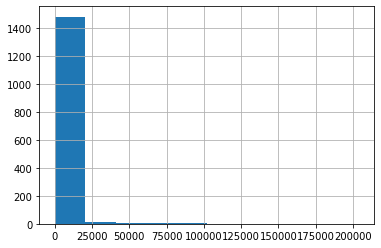

In [ ]:
usedf.standard_value.hist()

# Categorized to Active/ InActive from IC50
cutpoint = 50nM

In [ ]:
# category -> convert bioactivity 2 class -> active and inactive
#Arbitary cut-off IC50 at 50nM

usedf.standard_value.apply(lambda x: 'active' if x < 50 else 'inactive').value_counts()

active      866
inactive    645
Name: standard_value, dtype: int64

problem: activity assay was measured from differnet assay. then, The value were different even from the sames.

In [ ]:
usedf['bioactivity'] = usedf.standard_value.apply(lambda x: 'active' if x < 50 else 'inactive')

In [ ]:
usedf.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,assay_chembl_id,assay_description,document_chembl_id,document_year,molecule_pref_name,units,pchembl_value,bioactivity
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,7.96,active
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.31,inactive
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.34,inactive


In [ ]:
usedf.molecule_chembl_id.nunique()

1277

In [ ]:
# usedf.to_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i_ic50_activity.csv', index=None)